In [1]:
!pip install --upgrade gensim
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def creation_cluster(taille=11):
  models=[]
  all_word_vectors=[]
  Mois=['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre']
  for i in range(taille):
    word_vectors = Word2Vec.load("../word2vec/word2vec{}.model".format(i+1)).wv
    model = KMeans(n_clusters=3, max_iter=5000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

    centre_2=word_vectors.similar_by_vector(model.cluster_centers_[2], topn=20, restrict_vocab=None)
    centre_1=word_vectors.similar_by_vector(model.cluster_centers_[1], topn=20, restrict_vocab=None)
    centre_0=word_vectors.similar_by_vector(model.cluster_centers_[0], topn=20, restrict_vocab=None)

    print("pour le mois de {} mots les plus proches du centre indexé à 2:  {}".format(Mois[i],[word[0] for word in centre_2]) )
    print("                                                          à 1:  {}".format([word[0] for word in centre_1]))
    print("                                                          à 0:  {}".format([word[0] for word in centre_0]))

    models.append(model)
    all_word_vectors.append(word_vectors)
  return models,all_word_vectors



In [3]:
def graphique_kmeans(words,vec_0,vec_1,axis):

  sns.set_palette("Paired")
  sns.scatterplot(vec_0[:50], vec_1[:50], hue=words['cluster_value'][:50], s=50,ax=axis)
  for i in range(50):
      axis.annotate(words['words'][i],(vec_0[i]+1, vec_1[i]+1))
    


In [4]:
def creation_dictionnaire_sentiment(model,word_vectors,pos,neg,neu,axis):

    positive_cluster_center = model.cluster_centers_[pos]
    negative_cluster_center = model.cluster_centers_[neg]
    neutral_cluster_center = model.cluster_centers_[neu]

    words = pd.DataFrame(word_vectors.index_to_key)
    words.columns = ['words']
    words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
    words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
    words.cluster = words.cluster.apply(lambda x: x[0])

    words['cluster_value'] = [1 if i==pos else 0 if i==neu else -1 for i in words.cluster]
    words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
    words['sentiment_coeff'] = words.closeness_score * words.cluster_value

    df_acp=pd.DataFrame([vec for vec in words['vectors']])
    scaler=StandardScaler()
    segmentation_std=scaler.fit_transform(df_acp)
    pca=PCA(n_components=2)
    pca.fit(segmentation_std)
    vec_reduit=pca.transform(segmentation_std)
    vec_0=vec_reduit[:,0]
    vec_1=vec_reduit[:,1]
    graphique_kmeans(words,vec_0,vec_1,axis)


    return words[['words', 'sentiment_coeff']]

In [5]:
models,all_word_vectors=creation_cluster()

pour le mois de Janvier mots les plus proches du centre indexé à 2:  ['need', 'wallet', 'or', 'lost', 'bugg', 'trust', 'metamask', 'bitcoin', 'intro', 'logo', 'binanc', 'account', 'youtub', 'truc', 'tet', 'hacked', 'instagram', 'genr', 'ratio', 'ok']
                                                          à 1:  ['hautvisag', 'clairpouc', 'roulantsvisag', 'oeilvisag', 'basvisag', 'boudeurpouc', 'joiepouc', 'hautind', 'rev', 'hautteint', 'hautmain', 'boudeurvisag', 'souriantspouc', 'courb', 'droiteteint', 'bas', 'chisteint', 'applaudirteint', 'che', 'fl']
                                                          à 0:  ['peintur', 'bce', 'squat', 'incant', 'luxembourg', 'syndical', 'maximal', 'dul', 'booster', 'regim', 'crab', 'phob', 'applaudirapplaud', 'sanguinair', 'monstrueux', 'macronism', 'docil', 'compromettr', 'opaqu', 'triqu']
pour le mois de Février mots les plus proches du centre indexé à 2:  ['champion', 'entend', 'ah', 'rieux', 'reich', 'agent', 'pauvr', 'unit', 'veux', 'ph

In [6]:
#je construit la liste d'indices positives,negatives et neutre  de chaque moi moi en observant 20 plus proches voisins je deduis la nature des sentiments de chaque indice
pos=[1,1,1,1,0,2,0,1,2,1,2]  
neg=[0,1,2,2,2,0,1,2,1,0,0]
neu=[2,2,0,0,1,1,1,0,0,2,1]

In [7]:
def tous_les_dictionnaires(taille=11):
  figure, axis = plt.subplots(taille, 1,figsize=(20, 70))
  Mois=['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre']
  for i in range(taille):
    axis[i].set_title("disposition des mots le mois de {}".format(Mois[i]))
    creation_dictionnaire_sentiment(models[i],all_word_vectors[i],pos[i],neg[i],neu[i],axis[i]).to_csv("../dict_sentiment{}.csv".format(i+1),index=False)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

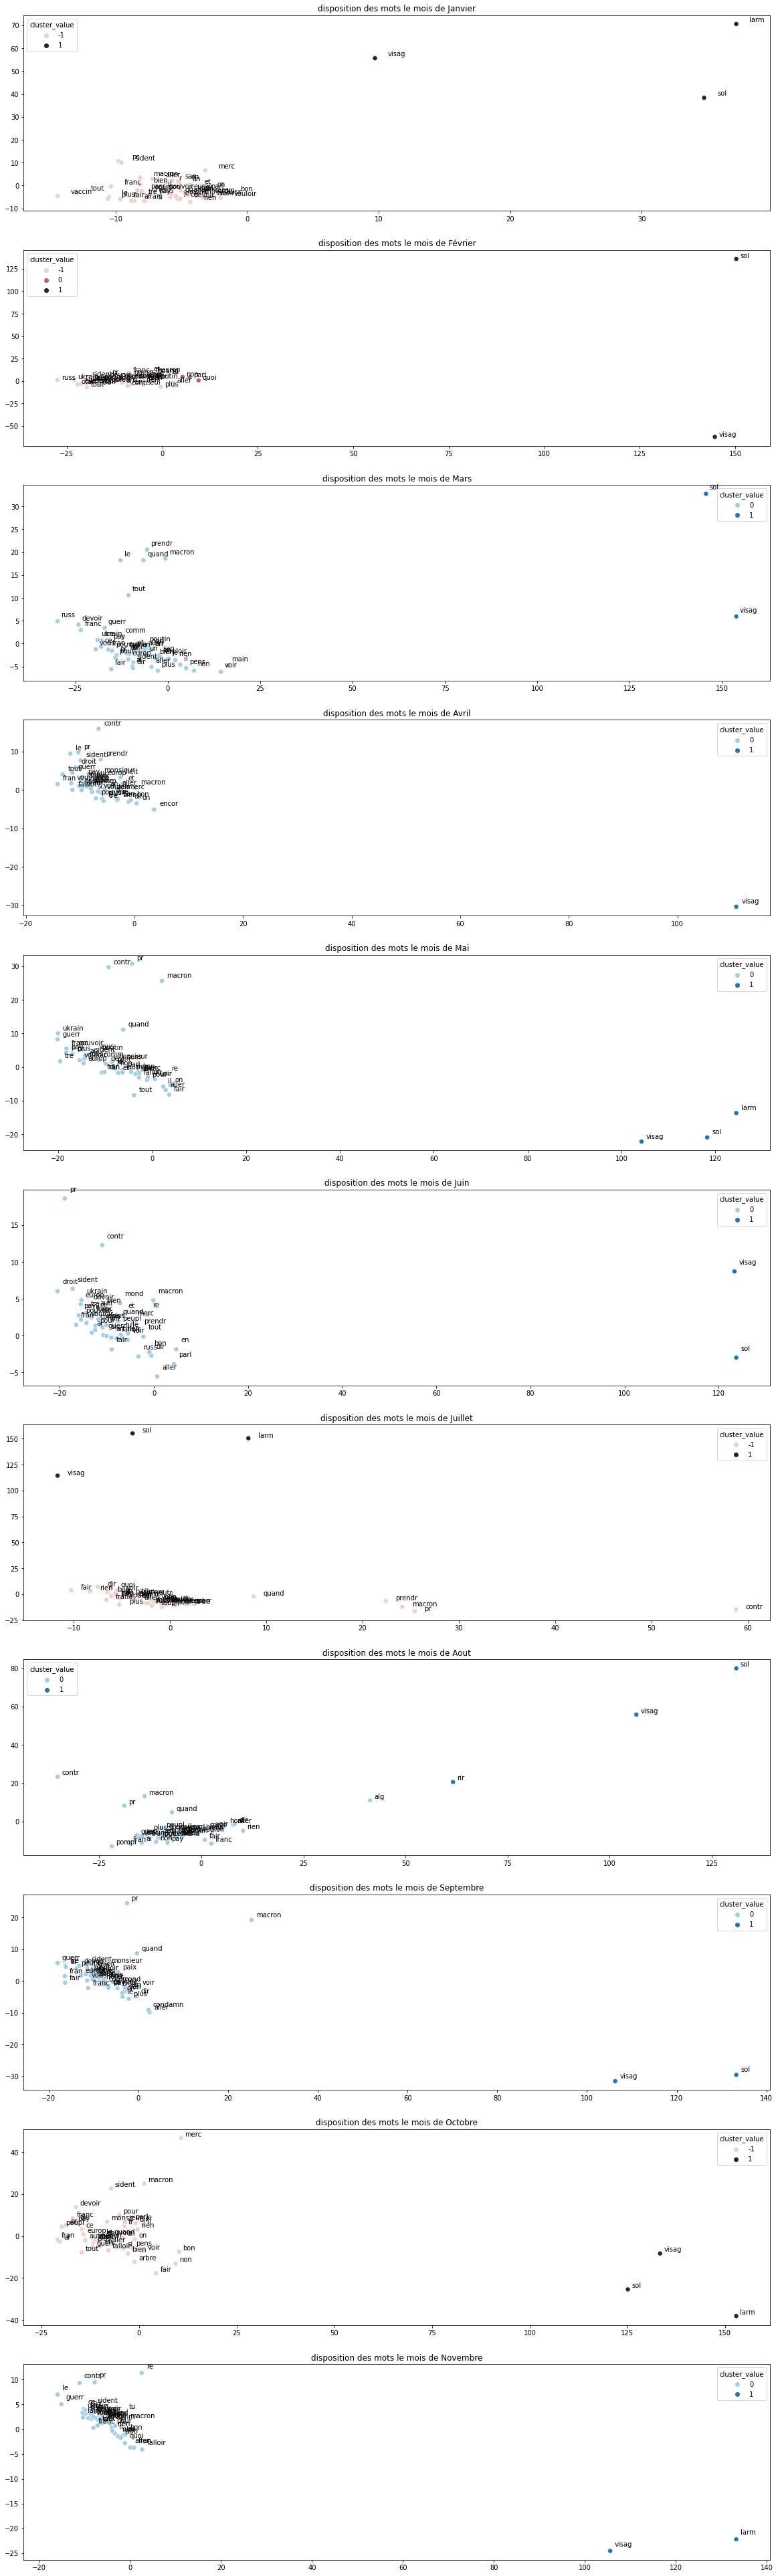

In [8]:
tous_les_dictionnaires()